## Spam Detection Model 

In [67]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [50]:
# Loading the dataset
df=pd.read_csv("SPAM text message 20170820 - Data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [52]:
df.Category.value_counts().reset_index()

,index,Category
0,ham,4825
1,spam,747


Distribution of Ham and spam


<AxesSubplot:xlabel='Category', ylabel='count'>

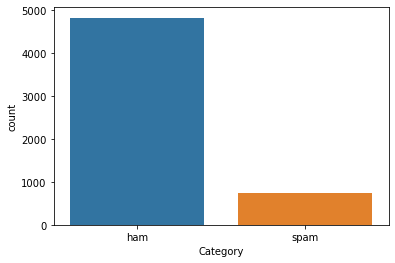

In [53]:
# Plotting the graph
print("Distribution of Ham and spam")
sns.countplot(df['Category'])

In [55]:
# Converting the "Category" to 0,1 pandas map function
df['Category']=df['Category'].map({'ham' : 0, 'spam' : 1 })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  0 non-null      float64
 1   Message   5572 non-null   object 
dtypes: float64(1), object(1)
memory usage: 87.2+ KB


#### Cleaning the messages column in Dataset

Here we concentrate on removing special characters and punctuations

In [56]:
# Priting the dataset
df

,Category,Message
0,NaN,"Go until jurong point, crazy.. Available only ..."
1,NaN,Ok lar... Joking wif u oni...
2,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,NaN,U dun say so early hor... U c already then say...
4,NaN,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,NaN,This is the 2nd time we have tried 2 contact u...
5568,NaN,Will ü b going to esplanade fr home?
5569,NaN,"Pity, * was in mood for that. So...any other s..."
5570,NaN,The guy did some bitching but I acted like i'd...


In [57]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) 
    emoticon = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticon).replace('-', '')
    return text

In [58]:
df['Message']=df['Message'].apply(preprocessor)

Splitting the dataset to train and test

In [59]:
X=df["Message"]
y=df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [63]:
# Shape of X_train and X_test
print("X_train : "+str(X_train.shape))
print("X_test : "+str(X_test.shape))

X_train : (3900,)
X_test : (1672,)


In [68]:
# Vectorize the text into numerical form

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)